In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [3]:
df = pd.read_csv('/workspaces/ds-fall-2025-fri-1230/Week-03-EDA-and-Dashboards/data/movie_ratings.csv')
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [8]:
df['genres'].value_counts()

genres
Drama          39895
Comedy         29832
Action         25589
Thriller       21872
Romance        19461
Adventure      13753
Sci-Fi         12730
War             9398
Crime           8055
Children        7182
Horror          5317
Mystery         5245
Musical         4954
Animation       3605
Western         1854
Film-Noir       1733
Fantasy         1352
Documentary      758
unknown           10
Name: count, dtype: int64

<Axes: xlabel='genres'>

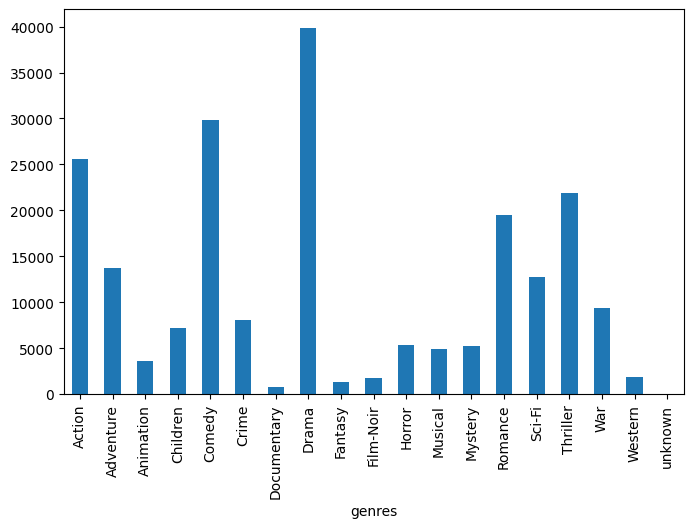

In [ ]:
# Question 1: What's the breakdown of genres for the movies that were rated?
gb_genres = df.groupby('genres')

genres_breakdown = gb_genres['rating'].count()

genres_breakdown.plot(
    kind='bar',
    x='genres',
    y='rating',
    figsize=(8,5)
)

<Axes: xlabel='rating', ylabel='genres'>

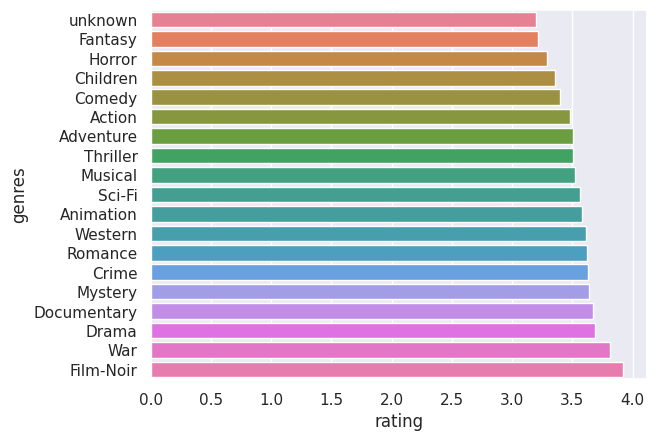

In [52]:
# Question 2: Which genres have the highest viewer satisfaction(highest ratings)?
df['rating'].value_counts()
sns.set()

genre_ratings = df.groupby('genres')['rating'].mean().reset_index().sort_values(by='rating')


sns.barplot(data=genre_ratings, x='rating', y='genres', hue='genres')



<Axes: xlabel='year', ylabel='rating'>

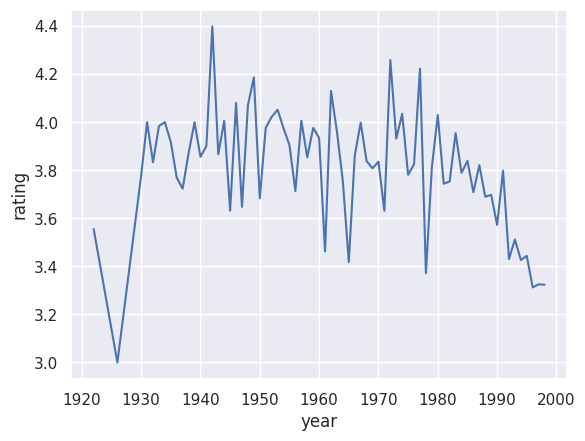

In [51]:
# Question 3: How does mean rating change across movie release years?
df['rating_year'].value_counts()

df.head()
yearly_ratings = df.groupby('year')['rating'].mean().reset_index()


sns.lineplot(data=yearly_ratings, x='year', y='rating')


<Axes: xlabel='avg_rating', ylabel='title'>

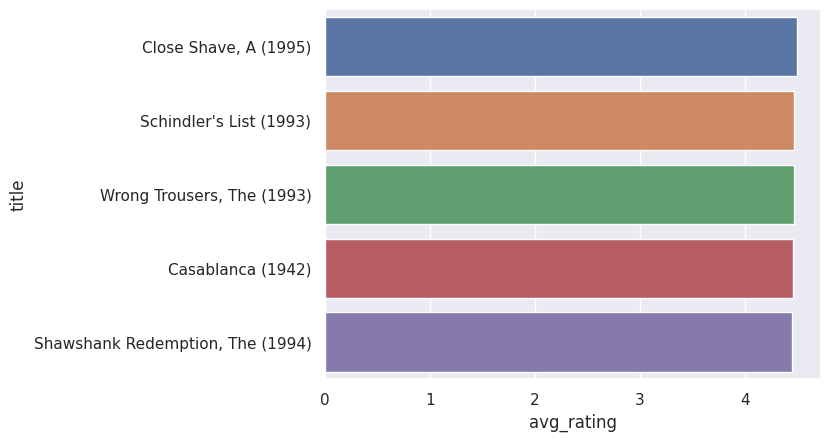

In [58]:
# Question 4: What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?
movie_stats = (
    df.groupby('title')
      .agg(avg_rating=('rating', 'mean'),
           num_ratings=('rating', 'count'))
      .reset_index()
)

best_50 = (
    movie_stats.query("num_ratings >= 50")
               .sort_values(by='avg_rating', ascending=False)
               .head(5)
)

# best_150 = (
#     movie_stats.query("num_ratings >= 150")
#                .sort_values(by='avg_rating', ascending=False)
#                .head(5)
# )
sns.barplot(data=best_150,x="avg_rating", y="title",hue='title')